In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [12]:
path = '/Users/ginazhou/Documents/GitHub/alli/kindful_report.csv'
df = pd.read_csv(path)


In [13]:
df.rename(columns={'kindful_report-2': 'amt', 
                    'Unnamed: 1': 'dates',
                    'Unnamed: 2': 'addr', 
                    'Unnamed: 3': 'city',
                    'Unnamed: 4': 'state',
                    'Unnamed: 5': 'zipcode'}, inplace=True)

df

,amt,dates,addr,city,state,zipcode
0,US$25.00,"December 20, 2022",,Melville,NY,11747
1,US$50.00,"November 15, 2022",,West Sayville,NY,11796
2,US$25.00,"April 28, 2022",,West Islip,NY,11795
3,US$25.00,"April 13, 2021",,Hauppauge,NY,11749
4,US$100.00,"November 30, 2021",,Huntington,NY,11743
...,...,...,...,...,...,...
514,US$125.00,"April 30, 2025",,Sands Point,NY,11050
515,US$125.00,"May 2, 2025",,Locust Valley,NY,11560
516,US$250.00,"May 3, 2025",#2112,North Hills,NY,11040
517,US$250.00,"May 3, 2025",,Oyster Bay,New York,11771


# RUNNING THE SAME CODE, BUT REMOVING ALL DONATIONS $2K+ 

In [26]:
# remove any amt that's greater than 2000
df['amt'] = df['amt'].replace('[\$US,]', '', regex=True).astype(float)
df = df[df['amt'] < 2000]

/var/folders/45/9flk40nj3h37tds8ywc514n80000gp/T/ipykernel_69817/138727396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amt'] = df['amt'].replace('[\$US,]', '', regex=True).astype(float)


In [27]:
print(f"# of cities: {len(df['city'].unique())}")

# distribution
df['city'].value_counts().head(10)

# of cities: 184


city
Huntington            36
Dix Hills             27
Northport             26
Huntington Station    17
Commack               16
Melville              15
East Northport        15
Greenlawn             10
Plainview              8
Jericho                8
Name: count, dtype: int64

^ huntington definitely tops the list.. 

does marianne see any patterns here? 

In [30]:
print(f"# of zip code: {len(df['zipcode'].unique())}")

# distribution of zip codes
df['zipcode'].value_counts().head(10)


# of zip code: 149


zipcode
11746    47
11743    40
11768    28
11731    17
11725    17
11747    16
11803    10
11787    10
11740     9
11791     9
Name: count, dtype: int64

In [31]:
# sort amount by year
df['year'] = pd.to_datetime(df['dates'], errors='coerce').dt.year
df.groupby('year')['amt'].sum().reset_index()


,year,amt
0,2020,4850.86
1,2021,15457.00
2,2022,13896.00
3,2023,7037.73
4,2024,7813.35
5,2025,10183.43


^ pandemic definitely made a difference! 
which year was the flood? 2003, so the recovery year 2004 the revenue suffered? 

^ having removed the donations.. the amount seems to be more balanced!  reversion to average?! 

In [32]:
# any seasonality? 
df['month'] = pd.to_datetime(df['dates'], errors='coerce').dt.month
df.groupby(['year', 'month'])['amt'].sum().reset_index().sort_values(by='amt', ascending=False).head(10)

,year,month,amt
6,2021,4,8244.00
26,2022,12,4626.00
25,2022,11,4106.00
27,2023,1,3300.00
49,2025,4,3060.01
48,2025,3,2835.02
37,2024,4,2542.74
31,2023,9,2322.10
3,2020,12,2035.00
47,2025,2,1856.62


^ feb topped the list twice. why?  
nov/dec was also on the top of list.. christmas time? 

^ april 2021 did really well?  post pandemic?  anything else that's special? 

In [33]:
# sort amount by city
df_city_amt = df.groupby('city')['amt'].sum().reset_index().sort_values(by='amt', ascending=False).head(10)
df_city_amt

,city,amt
118,Northport,6402.10
73,Huntington,3526.23
33,Dix Hills,2986.54
26,Commack,2586.61
80,Jericho,2390.01
143,Sands Point,1625.00
114,New York,1550.00
125,Plainview,1232.24
4,Baldwin,1154.35
76,Huntington Station,1116.28


In [34]:
# count # of cities
df_city = df['city'].value_counts().reset_index()
df_city


,city,count
0,Huntington,36
1,Dix Hills,27
2,Northport,26
3,Huntington Station,17
4,Commack,16
...,...,...
179,Greenport,1
180,West Sayville,1
181,Douglaston,1
182,Missing,1


In [35]:
df_city_amt['city'] = df_city_amt['city'].astype(str)
df_city['city'] = df_city['city'].astype(str)
df_city_amt.merge(df_city, on='city', how='left')

,city,amt,count
0,Northport,6402.10,26
1,Huntington,3526.23,36
2,Dix Hills,2986.54,27
3,Commack,2586.61,16
4,Jericho,2390.01,8
5,Sands Point,1625.00,2
6,New York,1550.00,6
7,Plainview,1232.24,8
8,Baldwin,1154.35,2
9,Huntington Station,1116.28,17


^ is the 10k / 5k / 3.5k donations or grants? so should the focus in (1) huntington and nortport local recuits, and (2) grants?! 

which years are those funding from? 


^^ revised: after removing donations, northport despite few counts, brought in more revenue?  why?!  donations again!!! 


In [38]:
# get more details on the top amounts 
df.loc[(df['city'] == 'Albany') |
       (df['city'] == 'Garden City') |
       (df['city'] == 'Huntington Bay') |
       (df['city'] == 'Northport')]

,amt,dates,addr,city,state,zipcode,year,month
64,155.00,"November 17, 2020",,Northport,NY,11768,2020,11
65,500.00,"April 20, 2021",,Northport,NY,11768,2021,4
71,25.00,"May 3, 2022",,Northport,NY,11768,2022,5
72,25.00,"December 8, 2020",,Northport,NY,11768,2020,12
73,1000.00,"December 13, 2022",,Northport,NY,11768,2022,12
83,50.00,"November 29, 2022",,Northport,NY,11768,2022,11
165,50.00,"April 20, 2022",,Northport,NY,11768,2022,4
180,50.00,"November 30, 2021",,Northport,NY,11768,2021,11
190,100.00,"November 29, 2022",,Northport,NY,11768,2022,11
200,50.00,"April 13, 2021",,Northport,NY,11768,2021,4


^ lots of mini donations northport?  is it an affluent, senior neighbourhood? maybe we need to low the threshold to 1000$? 

<Axes: title={'center': 'Distribution of amounts'}>

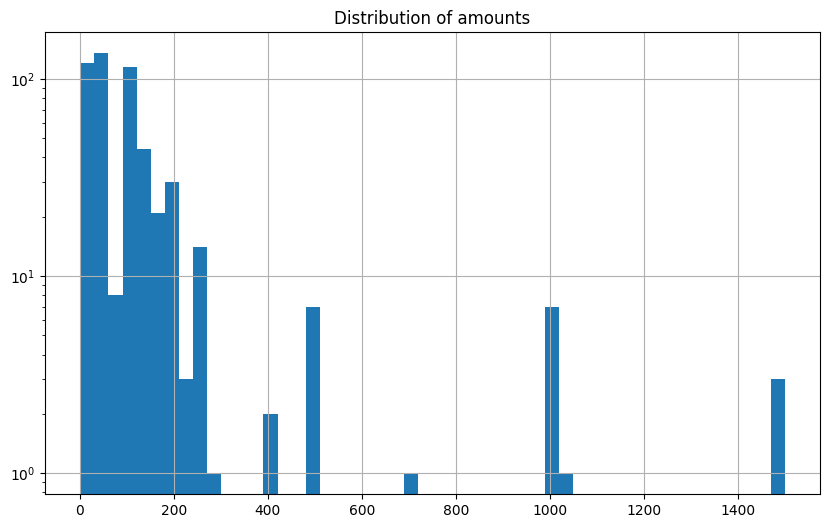

In [37]:
# histogram of amounts, log scale y axis
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.title('Distribution of amounts')    
df['amt'].hist(bins=50)

^ i'm afraid we have to remove hte 2000$ up amounts, becuase they are screwing the analysis.. 

^^ in order to get a good view of income from classes we need to look at sub $400 